In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def plotimg(img):
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=[15,15])
    plt.imshow(img, cmap = 'gray')
    
    plt.xticks([]),plt.yticks([])
    plt.show()



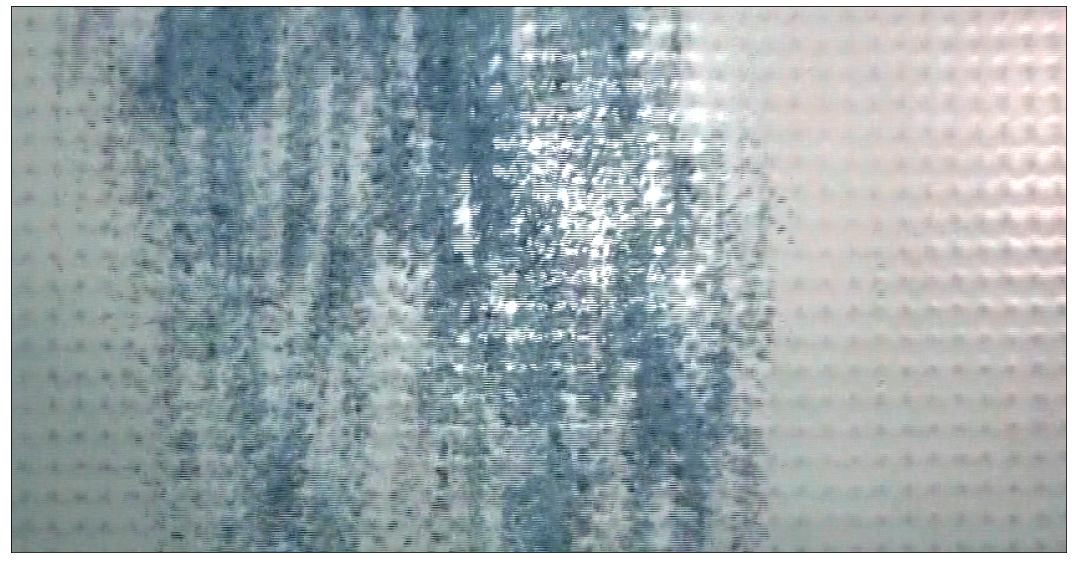

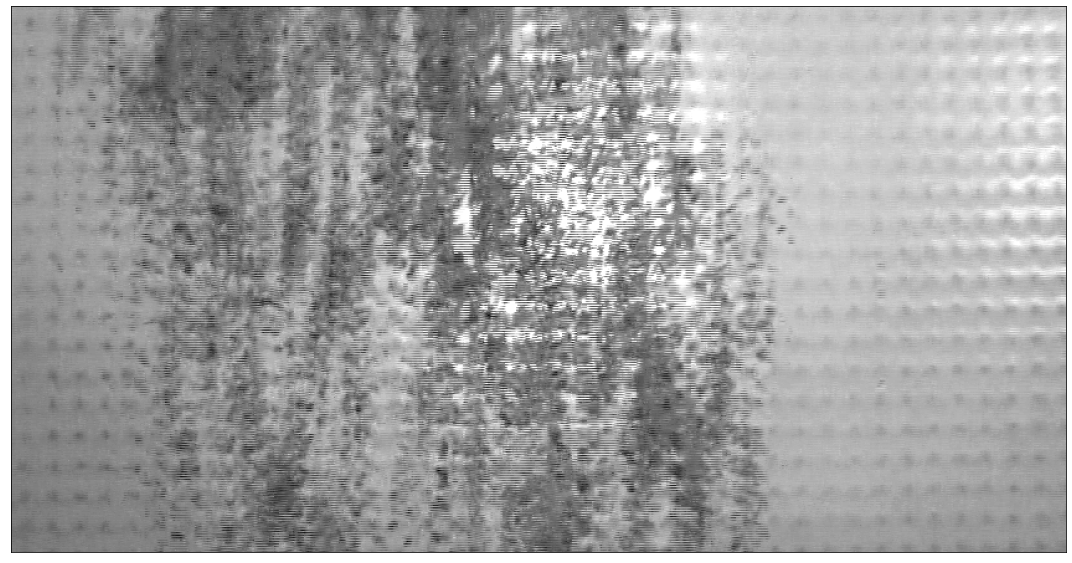

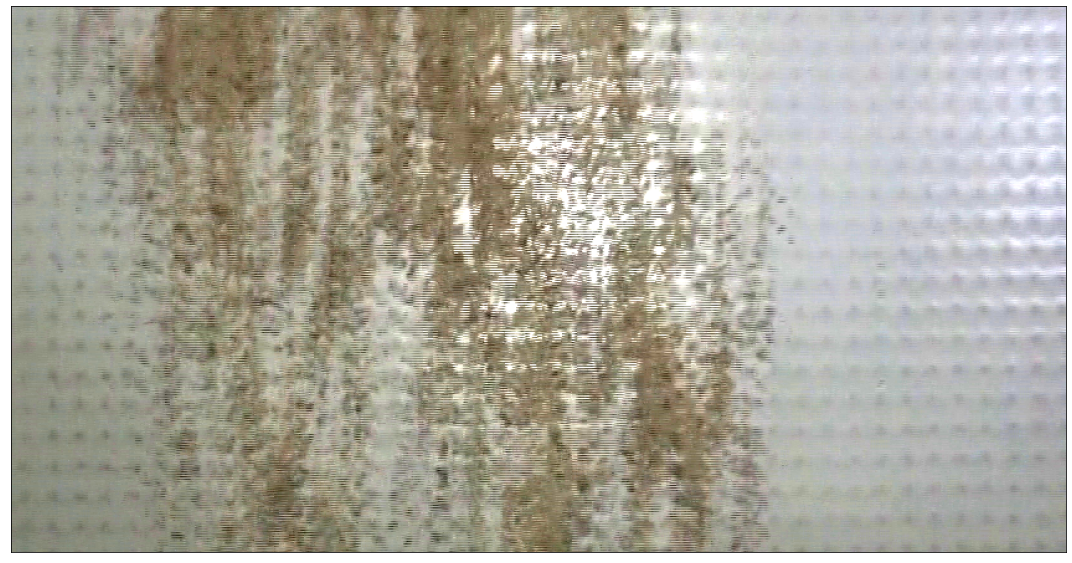

In [2]:
img_b = cv2.imread("Frame_modified/58.bmp")
img_gray_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)
img_color_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)
plotimg(img_b) #BGR
plotimg(img_gray_b) #GrayScale
plotimg(img_color_b) #RGB

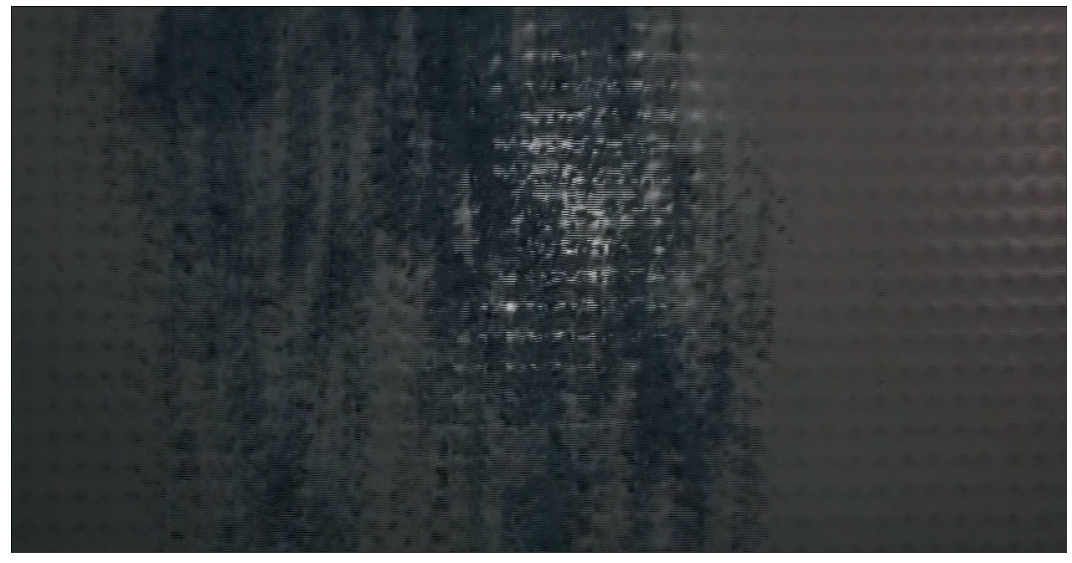

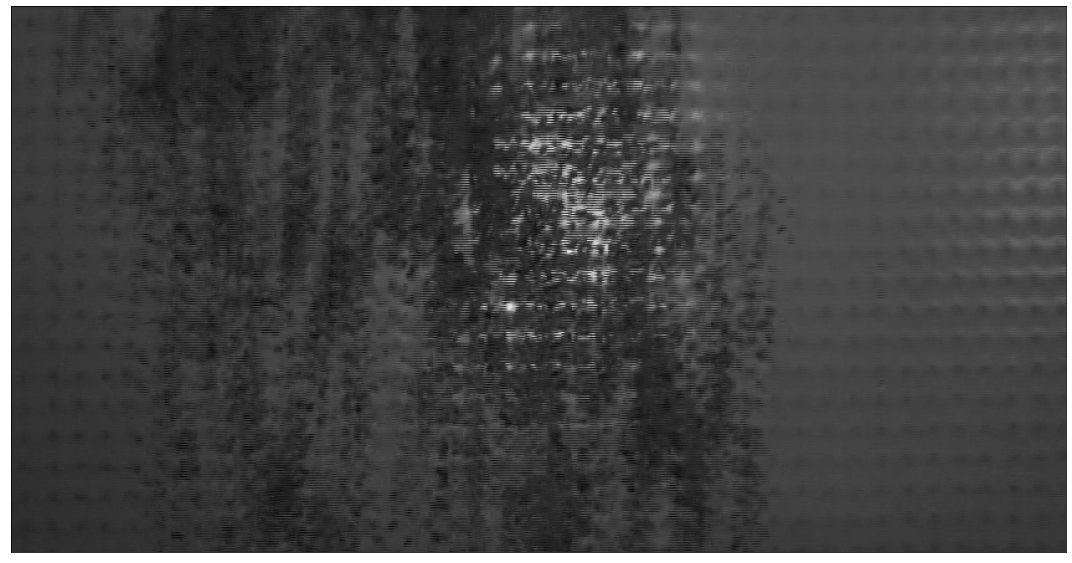

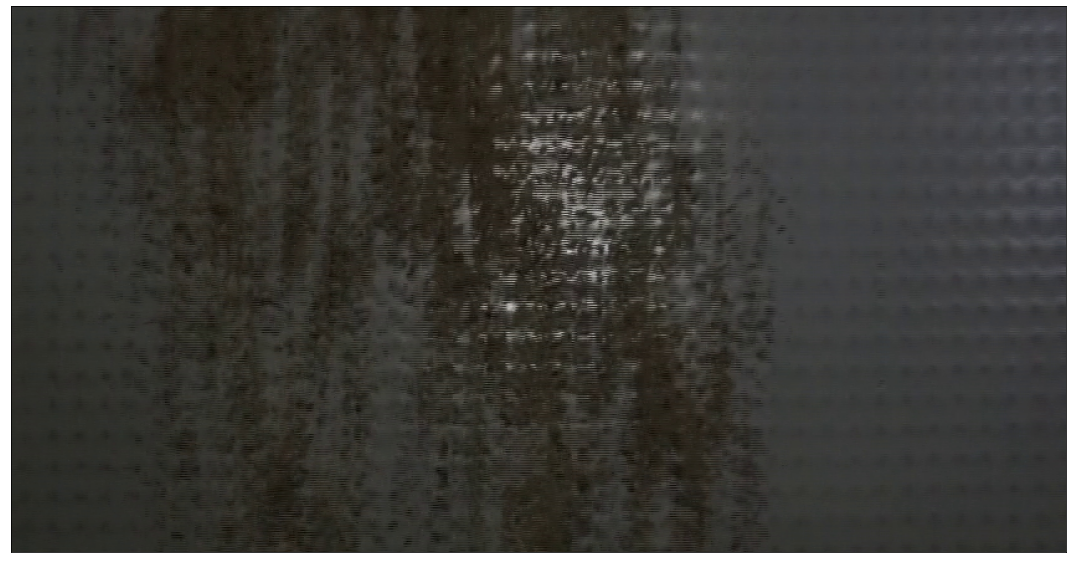

In [3]:
img = cv2.imread("Frame_cut/58.bmp")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plotimg(img) #BGR
plotimg(img_gray) #GrayScale
plotimg(img_color) #RGB

In [4]:
#Tamaño de recortes
img_color.shape

(440, 850, 3)

<Figure size 432x288 with 0 Axes>

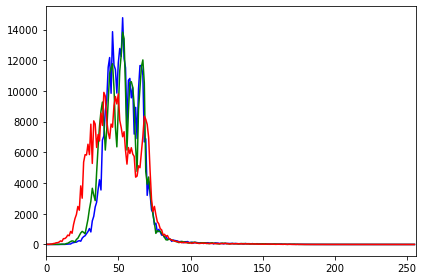

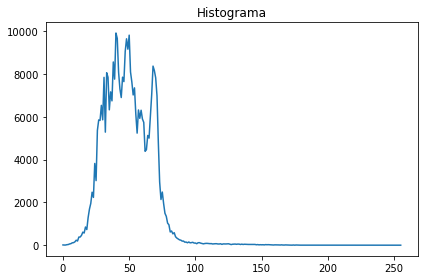

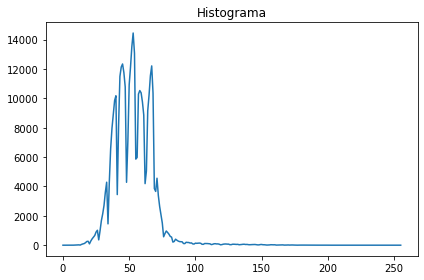

<Figure size 432x288 with 0 Axes>

In [5]:
#Histograma de colores
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_gray],[0],None,[256],[0,256])
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img_color], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.figure()

plt.plot(hist1),plt.title("Histograma")
plt.figure()
plt.plot(hist2),plt.title("Histograma")
plt.figure()



<Figure size 432x288 with 0 Axes>

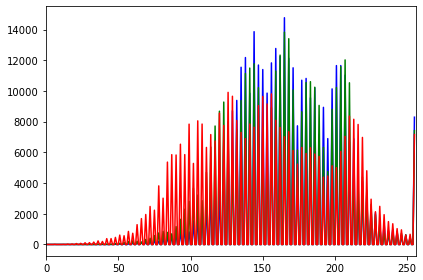

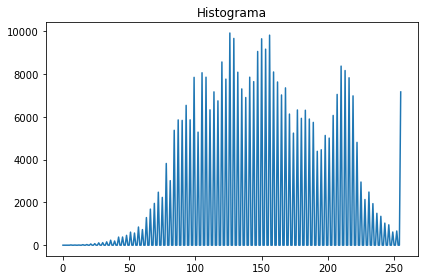

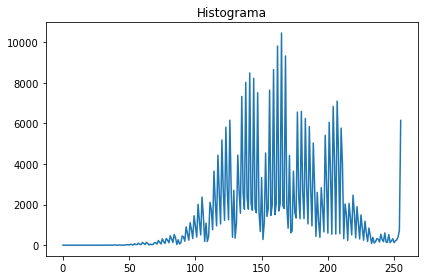

<Figure size 432x288 with 0 Axes>

In [6]:
#Histograma de colores
hist1 = cv2.calcHist([img_b],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_gray_b],[0],None,[256],[0,256])

color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img_color_b], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.figure()
plt.plot(hist1),plt.title("Histograma")
plt.figure()
plt.plot(hist2),plt.title("Histograma")
plt.figure()


<Figure size 432x288 with 0 Axes>

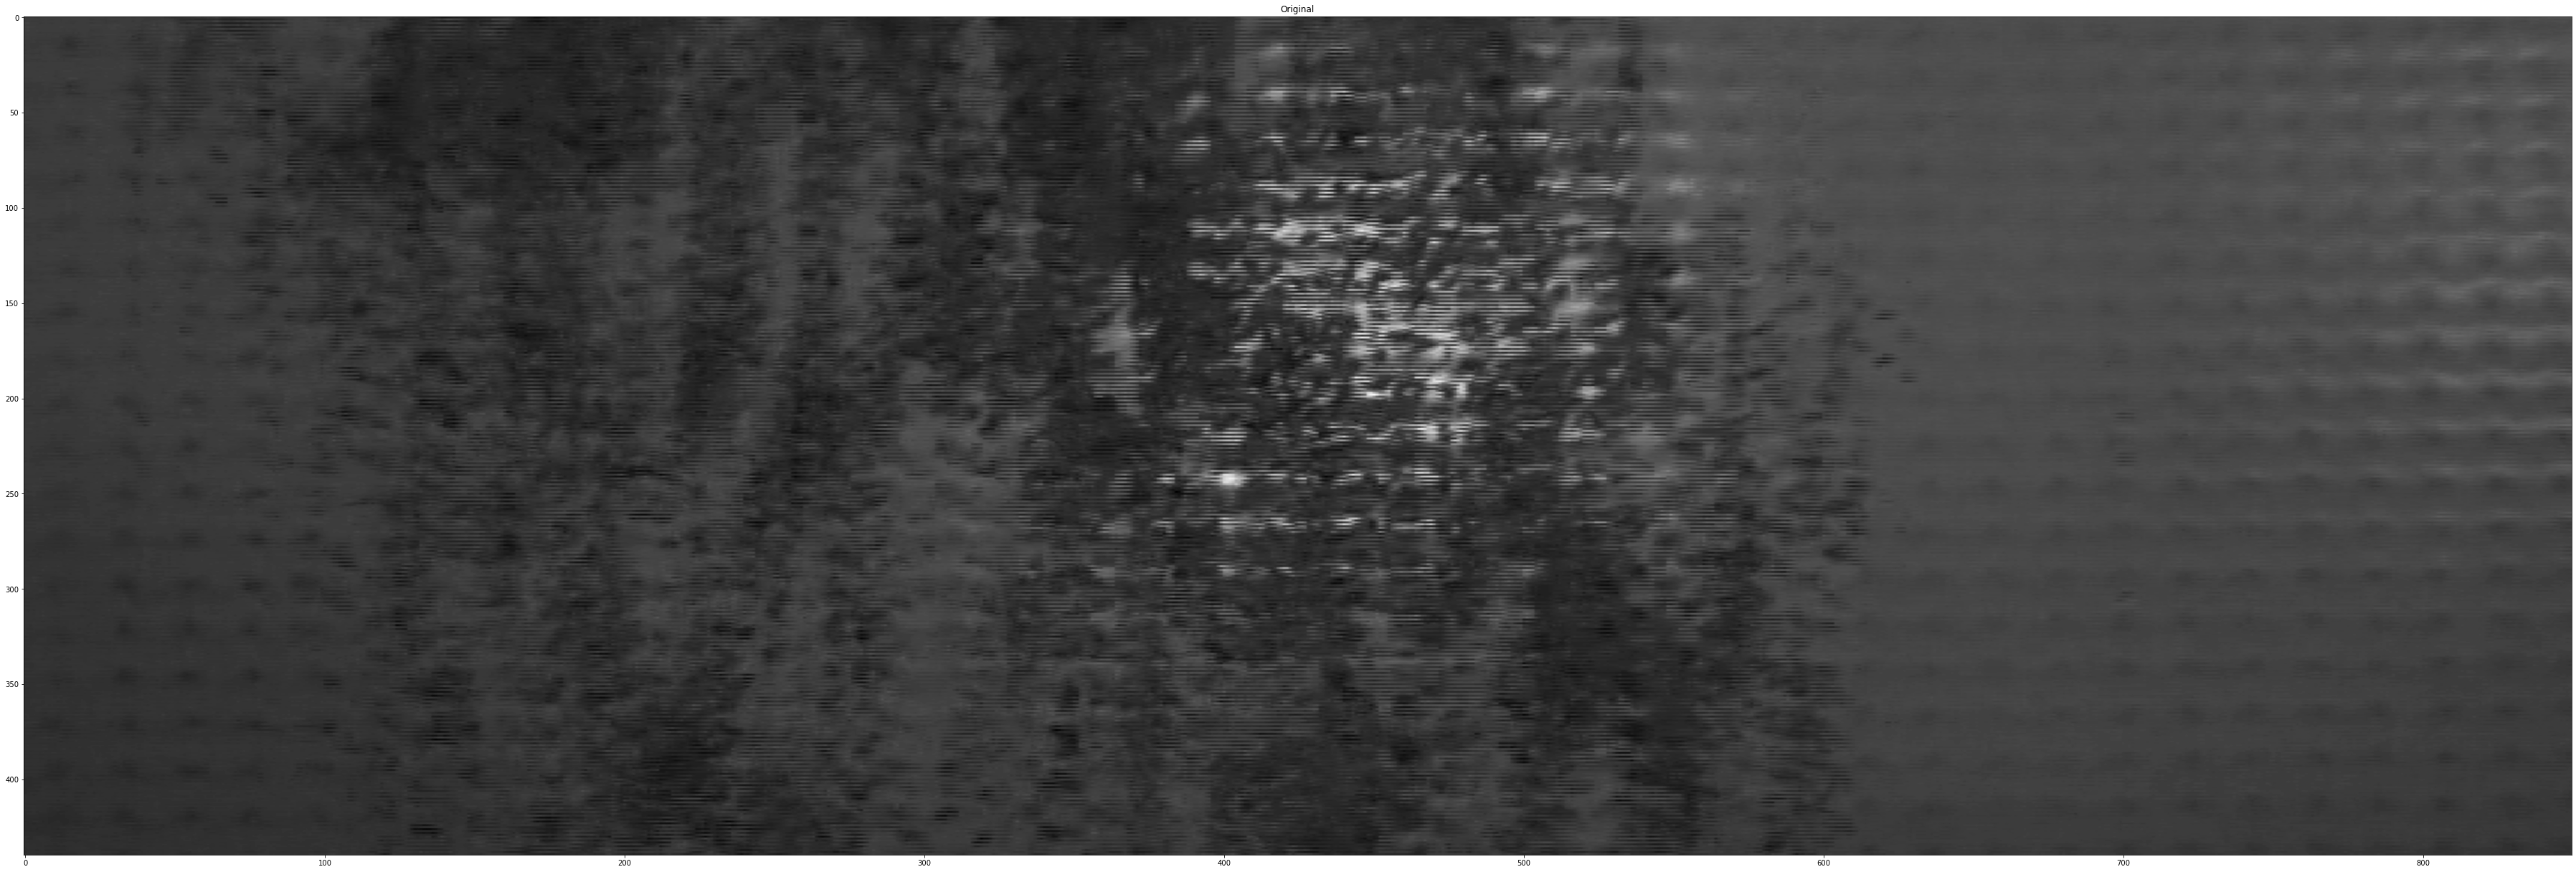

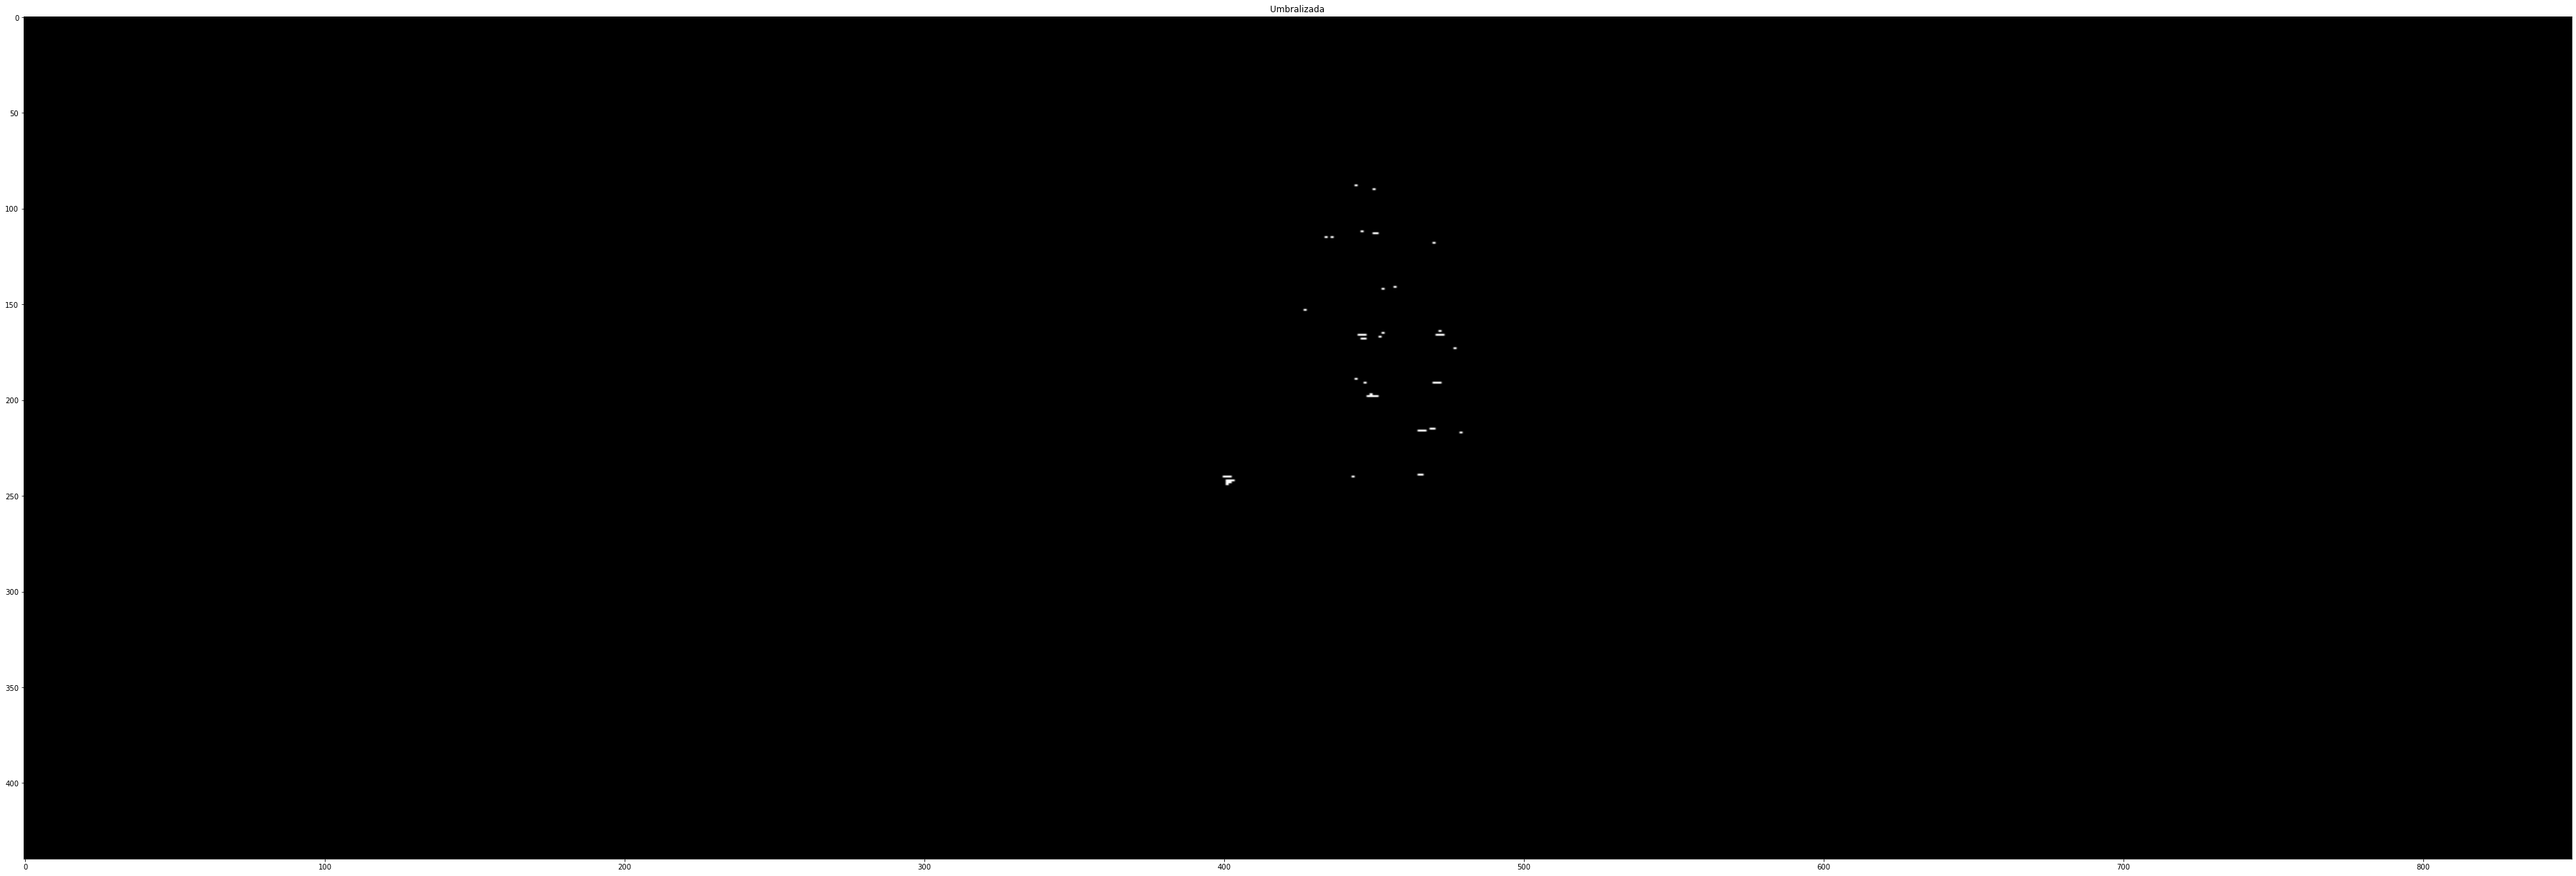

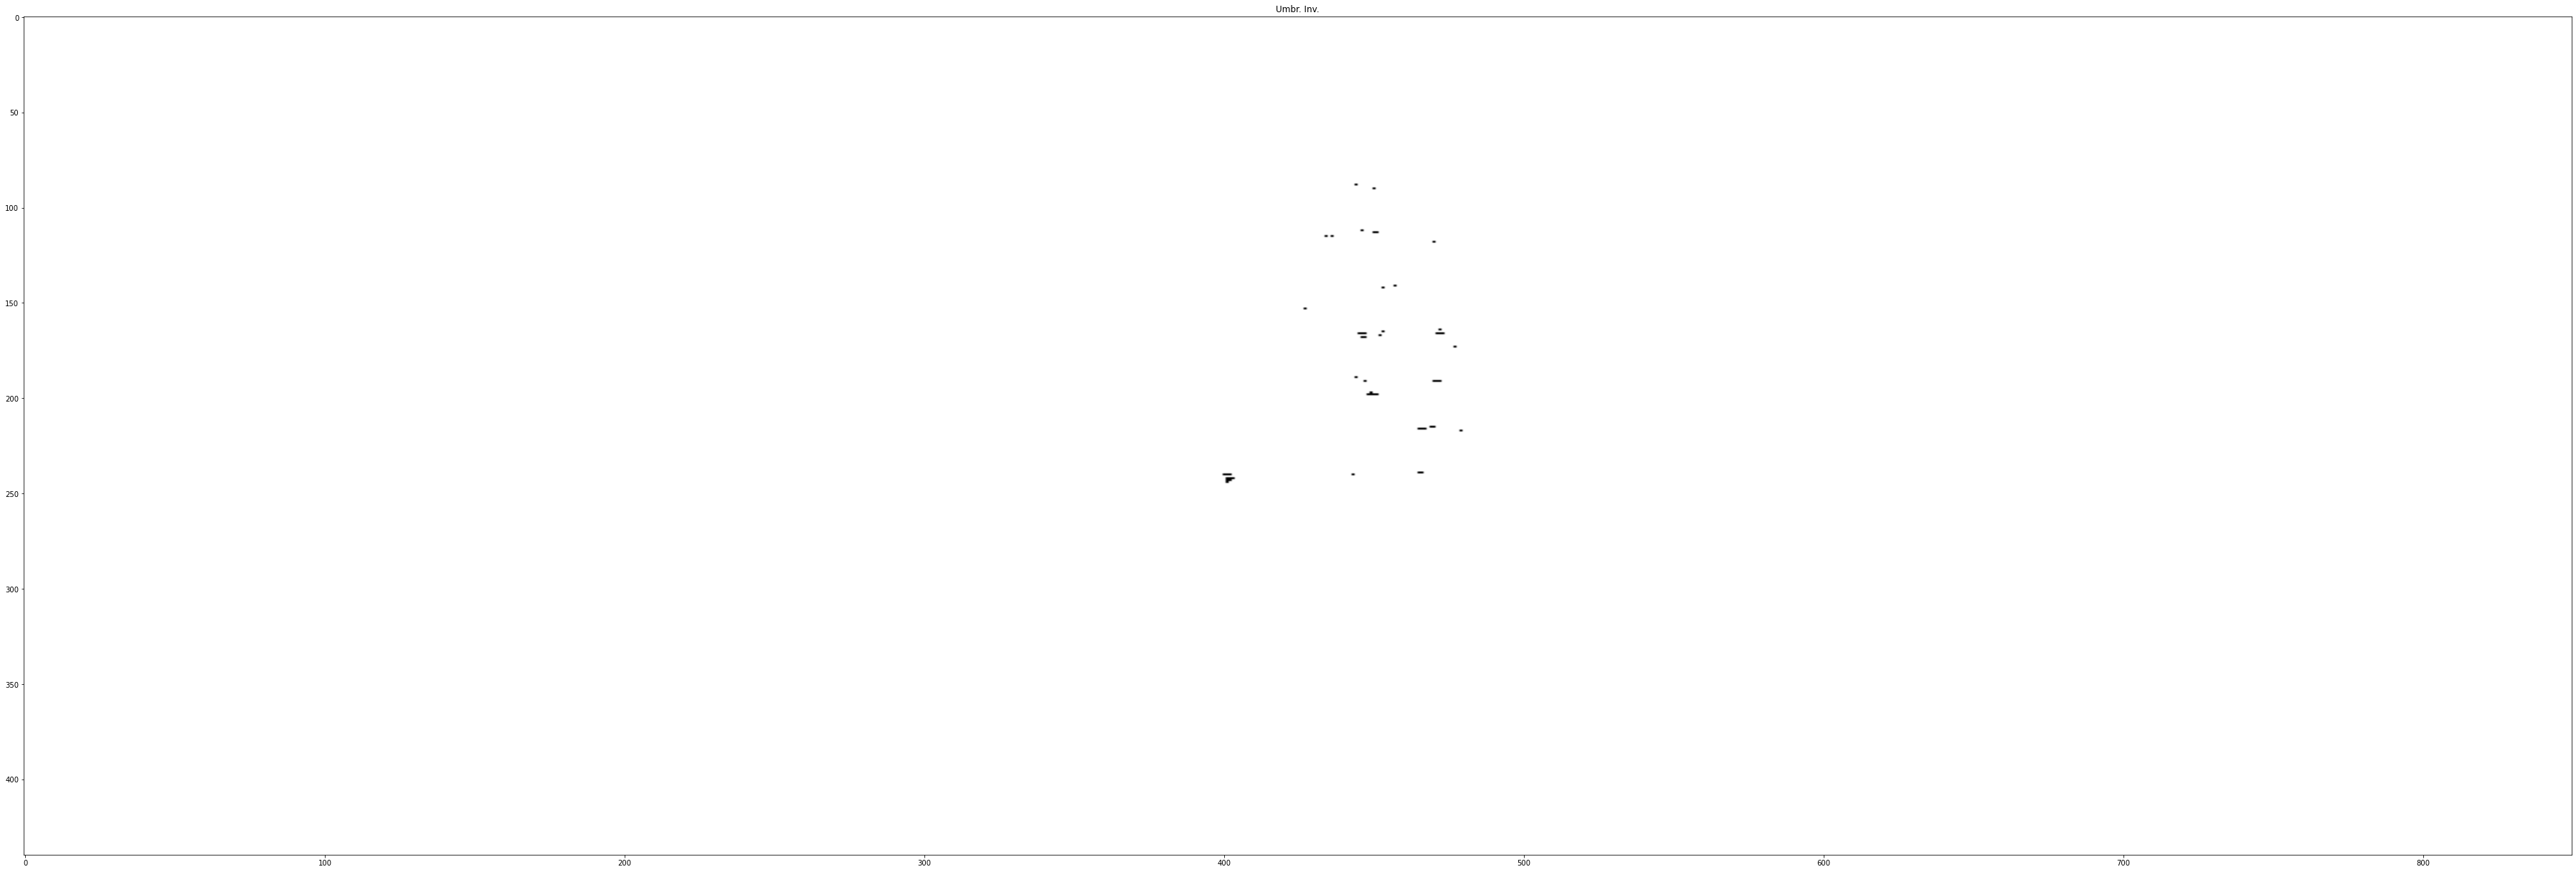

<Figure size 3600x3600 with 0 Axes>

In [22]:
width, height = img_gray.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=180 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img_gray[i,j] < H : 
            img_umbral[i,j] = 0
            img_umbral_inv[i,j] = 255
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img_gray[i,j] > IGMax: IGMax = img_gray[i,j]
        if img_gray[i,j] < IGmin: IGmin = img_gray[i,j]


#Visualizacion resulatado 
plt.figure(1)
plt.figure(figsize = (50,50))
plt.subplot(311), plt.imshow(img_gray, cmap='gray', aspect='auto'), plt.title('Original'), plt.figure(figsize = (50,50))
plt.subplot(312), plt.imshow(img_umbral, cmap='gray',aspect='auto'), plt.title('Umbralizada'),plt.figure(figsize = (50,50))
plt.subplot(313), plt.imshow(img_umbral_inv, cmap='gray',aspect='auto'), plt.title('Umbr. Inv.'),plt.figure(figsize = (50,50))
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()